# Imports

In [ ]:
# import pandas as pd
# df = pd.read_csv('data\Data\musicFeatuers.csv')

# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()

# # df['label'] =  label_encoder.fit_transform(df['label'])

# df = df.drop(['filename'], axis=1)



# X = df[['chroma_stft_mean','chroma_stft_var','rms_mean','rms_var','spectral_centroid_mean','spectral_centroid_var','spectral_bandwidth_mean','spectral_bandwidth_var']]

# y = df['label']

# y = df[['label']]
# X = df[df.columns.difference(['label'])]

# from sklearn.model_selection import train_test_split

# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=1)
# ## train a tree model
# sk_dt.fit(X_train, y_train)

# from sklearn.linear_model import LinearRegression
# # model = LinearRegression()
# # model.fit(X_train, y_train)


# from sklearn.metrics import classification_report

# predictions = sk_dt.predict(X_test)


# print(classification_report(y_test, predictions))

# y_pred = sk_dt.predict(X_test)



# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(Y_test,y_pred)
# print(mse)


In [ ]:
# %pip install librosa --user

In [1]:
import xgboost
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt;


import warnings
warnings.filterwarnings('ignore')
# ## create the classifier object leaving all params to default values except random_state
# sk_dt = DecisionTreeClassifier(random_state=1)


# Model

In [2]:
df = pd.read_csv(r'..\data\Data\features_3_sec.csv')

# df = df.drop(['filename'], axis=1)

# df = df[['chroma_stft_mean','chroma_stft_var','rms_mean','rms_var','spectral_centroid_mean','spectral_centroid_var','spectral_bandwidth_mean','spectral_bandwidth_var','label']]

df = df[['chroma_stft_mean','chroma_stft_var','rms_mean','rms_var','spectral_centroid_mean','spectral_centroid_var','spectral_bandwidth_mean','spectral_bandwidth_var','rolloff_mean','rolloff_var','zero_crossing_rate_mean','zero_crossing_rate_var','harmony_mean','harmony_var','tempo','label']]
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


df['label'] =  label_encoder.fit_transform(df['label'])

print(label_encoder.classes_)

y = df[['label']]
X = df[df.columns.difference(['label'])]


## split both X and y using a ratio of 70% training - 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(len(X_train), len(X_test), len(y_train), len(y_test))

target_name = ['blues', 'classical', 'country', 'disco', 'hiphop' ,'jazz' ,'metal', 'pop','reggae' ,'rock']


['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
6993 2997 6993 2997


In [3]:


xgb = xgboost.XGBClassifier(n_estimators=1000,enable_catergorical=True,learning_rate=0.05)
xgb.fit(X_train, y_train)

## make predictions on the test portion (predict the labels of the rows from the test portion of X)
predictionsXgb = xgb.predict(X_test)



print(classification_report(y_test, predictionsXgb, target_names=target_name))
## can also output the confusion matrix
# cm = confusion_matrix(y_test, predictions)
# print(cm)

print("Accuracy: " ,metrics.accuracy_score(y_test, predictionsXgb))

cols_when_model_builds = xgb.feature_names_in_


              precision    recall  f1-score   support

       blues       0.77      0.83      0.80       302
   classical       0.91      0.92      0.92       296
     country       0.68      0.76      0.72       312
       disco       0.78      0.78      0.78       283
      hiphop       0.85      0.79      0.82       320
        jazz       0.80      0.81      0.80       289
       metal       0.87      0.89      0.88       303
         pop       0.84      0.77      0.80       298
      reggae       0.78      0.73      0.75       310
        rock       0.65      0.61      0.63       284

    accuracy                           0.79      2997
   macro avg       0.79      0.79      0.79      2997
weighted avg       0.79      0.79      0.79      2997

Accuracy:  0.7911244577911245


In [ ]:
feature_importances = xgb.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


forest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
forest.fit(X_train, y_train)
predictionsForest = forest.predict(X_test)

print(classification_report(y_test, predictionsForest, target_names=target_name))
print("Accuracy: " ,metrics.accuracy_score(y_test, predictionsForest))



In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predictionsDTC = dtc.predict(X_test)

print(classification_report(y_test, predictionsDTC, target_names=target_name))
print("Accuracy: " ,metrics.accuracy_score(y_test, predictionsDTC))

In [ ]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

scaledX = preprocessing.scale(X_train)
scaledt = preprocessing.scale(X_test)


KNC = KNeighborsClassifier(n_neighbors=1)
KNC.fit(scaledX, y_train)
predictionsKNC = KNC.predict(scaledt)

print(classification_report(y_test, predictionsKNC, target_names=target_name))
print("Accuracy: " ,metrics.accuracy_score(y_test, predictionsKNC))


# Find Similar

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

def find_sim(data):
    placeHoldername = 'test'
    data['filename'] = placeHoldername

    df_sim = pd.read_csv(r'..\data\Data\features_30_sec.csv')

    df_sim = df_sim[['filename','chroma_stft_mean','chroma_stft_var','rms_mean','rms_var','spectral_centroid_mean','spectral_centroid_var','spectral_bandwidth_mean','spectral_bandwidth_var','rolloff_mean','rolloff_var','zero_crossing_rate_mean','zero_crossing_rate_var','harmony_mean','harmony_var','tempo','label']]


    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    df_sim['label'] = df_sim['label'].astype("string")
    df_sim['label'] =  label_encoder.fit_transform(df_sim['label'])




    combined_df = pd.concat([df_sim, data], ignore_index=True)

    combined_df = combined_df.set_index('filename')

 
    labels = combined_df[['label']]

    
    scaled = preprocessing.scale(combined_df)
    similarity = cosine_similarity(scaled)
    sim_df_labels = pd.DataFrame(similarity)
    sim_df_names = sim_df_labels.set_index(labels.index)
    sim_df_names.columns = labels.index

    series = sim_df_names[placeHoldername].sort_values(ascending=False)
    series = series.drop(placeHoldername)


    series = series.head(3).to_dict()

    from collections import Counter

    k = Counter(series)
    
    # Finding 3 highest values
    series = k.most_common(3) 
    
    for i in series:
        print(i[0]," :",i[1]," ")

    return series





In [ ]:
def extract_features(file):
    y, sr = librosa.load(file)

    chroma_sft_mean =  np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    chroma_sft_var =  librosa.feature.chroma_stft(y=y, sr=sr).var()

    rms_mean = librosa.feature.rms(y=y).mean()
    rms_var = librosa.feature.rms(y=y).var()

    spectral_centroid_mean = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    spectral_centroid_var = librosa.feature.spectral_centroid(y=y, sr=sr).var()

    spectral_bandwith_mean = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()
    spectral_bandwith_var = librosa.feature.spectral_bandwidth(y=y, sr=sr).var()

    rolloff_mean = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
    rolloff_var = librosa.feature.spectral_rolloff(y=y, sr=sr).var()

    zero_crossing_rate_mean = librosa.feature.zero_crossing_rate(y=y).mean()
    zero_crossing_rate_var = librosa.feature.zero_crossing_rate(y=y).var()


    harmony_mean = librosa.effects.harmonic(y).mean()
    harmony_var = librosa.effects.harmonic(y).var()

    tempo = librosa.feature.tempo(y=y, sr=sr)[0]

    

    print("chroma_sft_mean: ",chroma_sft_mean)
    print("chroma_sft_var: ",chroma_sft_var)
    print("rms_mean: ",rms_mean)
    print("rms_var: ",rms_var)
    print("spectral_centroid_mean: ",spectral_centroid_mean)
    print("spectral_centroid_var: ",spectral_centroid_var)
    print("spectral_bandwith_mean: ",spectral_bandwith_mean)
    print("spectral_bandwith_var: ",spectral_bandwith_var)
    print("rolloff_mean: ",rolloff_mean)
    print("rolloff_var: ",rolloff_var)
    print("zero_crossing_rate_mean: ",zero_crossing_rate_mean)
    print("zero_crossing_rate_var: ",zero_crossing_rate_var)
    print("harmony_mean: ",harmony_mean)
    print("harmony_var: ",harmony_var)
    print("tempo: ",tempo)

    features = pd.DataFrame({'chroma_stft_mean':[chroma_sft_mean],'chroma_stft_var':[chroma_sft_var],'rms_mean':[rms_mean],'rms_var':[rms_var],'spectral_centroid_mean':[spectral_centroid_mean],
                             'spectral_centroid_var':[spectral_centroid_var],'spectral_bandwidth_mean':[spectral_bandwith_mean],'spectral_bandwidth_var':[spectral_bandwith_var],
                             'rolloff_mean':[rolloff_mean],'rolloff_var':[rolloff_var],'zero_crossing_rate_mean':[zero_crossing_rate_mean],'zero_crossing_rate_var':[zero_crossing_rate_var],
                             'harmony_mean':[harmony_mean],'harmony_var':[harmony_var],'tempo':[tempo],})
    

    features = features.reindex(columns=cols_when_model_builds)

    # features = features.reshape(-1,1)
    return features



In [ ]:
features1 =  extract_features(r"..\music\Beyoncé-Single Ladies.mp3")

# genre1 = xgb.predict(features1)

# features1['label'] = genre1[0]

# print("Similiar Songs:",find_sim(features1))


In [ ]:
import joblib

model = joblib.load('model.pkl')
genre1 = model.predict(features1)

print(genre1[0])
print(model.get_booster().feature_names)

# Find Prediction

In [ ]:
def find_pred(result):
    import json
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression

    model = LinearRegression()

    dfs = []

    if(result is None):
        return "Null"
    

    df = pd.DataFrame.from_dict(result, orient='index')
    dfs.append(df)


    combined_df = pd.concat(dfs, ignore_index=True)

    newData=[]
    for i in range(len(df)):
        y = json.loads(combined_df[0][i])
        newData.append(y)

    if(len(newData)<3):
        return "Not enough"

    newData = pd.DataFrame(newData)

    finalDf = pd.DataFrame()
    for i in range(len(newData)):
        df = pd.DataFrame([newData[0][i]])
        finalDf = pd.concat([finalDf, df], ignore_index=True)



    # finalDf =  finalDf.drop(['label'], axis=1)

    features = pd.DataFrame(columns=finalDf.columns)

    for column in finalDf:
        X_train, X_test, y_train, y_test = train_test_split(finalDf, finalDf[column], test_size=0.2)
        model.fit(X_train, y_train)
        prediction = model.predict(X_test)
        features.loc[0, column] = prediction[0]  # Assuming you want to update the first row (index 0)
        # print(column,":",prediction[0])
        
    



    return features




In [ ]:
from firebase import firebase

firebase = firebase.FirebaseApplication('https://orpheus-3a4fa-default-rtdb.europe-west1.firebasedatabase.app/', None)
result = firebase.get('/users', 'LPzlgxH7J6TlEkBU39oXYMMGSlU2')

pred= find_pred(result)
print(pred)
# find_sim(pred)

In [ ]:
def find_pred_poly(data, features, predicted_feature):
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression

    features = features.drop(['filename'], axis=1)

    X_train, X_test, y_train, y_test = train_test_split(data, data[predicted_feature], test_size=0.2)

    model = LinearRegression()
    model.fit(X_train, y_train)


    prediction = model.predict(features)

    return prediction[0]

# Feature Extractor



In [7]:
def extract_features(file):
    y, sr = librosa.load(file)

    chroma_sft_mean =  np.mean(librosa.feature.chroma_stft(y=y, sr=sr))
    chroma_sft_var =  librosa.feature.chroma_stft(y=y, sr=sr).var()

    rms_mean = librosa.feature.rms(y=y).mean()
    rms_var = librosa.feature.rms(y=y).var()

    spectral_centroid_mean = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    spectral_centroid_var = librosa.feature.spectral_centroid(y=y, sr=sr).var()

    spectral_bandwith_mean = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()
    spectral_bandwith_var = librosa.feature.spectral_bandwidth(y=y, sr=sr).var()

    rolloff_mean = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
    rolloff_var = librosa.feature.spectral_rolloff(y=y, sr=sr).var()

    zero_crossing_rate_mean = librosa.feature.zero_crossing_rate(y=y).mean()
    zero_crossing_rate_var = librosa.feature.zero_crossing_rate(y=y).var()


    harmony_mean = librosa.effects.harmonic(y).mean()
    harmony_var = librosa.effects.harmonic(y).var()

    tempo = librosa.feature.tempo(y=y, sr=sr)[0]

    

    # print("chroma_sft_mean: ",chroma_sft_mean)
    # print("chroma_sft_var: ",chroma_sft_var)
    # print("rms_mean: ",rms_mean)
    # print("rms_var: ",rms_var)
    # print("spectral_centroid_mean: ",spectral_centroid_mean)
    # print("spectral_centroid_var: ",spectral_centroid_var)
    # print("spectral_bandwith_mean: ",spectral_bandwith_mean)
    # print("spectral_bandwith_var: ",spectral_bandwith_var)
    # print("rolloff_mean: ",rolloff_mean)
    # print("rolloff_var: ",rolloff_var)
    # print("zero_crossing_rate_mean: ",zero_crossing_rate_mean)
    # print("zero_crossing_rate_var: ",zero_crossing_rate_var)
    # print("harmony_mean: ",harmony_mean)
    # print("harmony_var: ",harmony_var)
    # print("tempo: ",tempo)
    print('---------------------------------------------------')

    features = pd.DataFrame({'chroma_stft_mean':[chroma_sft_mean],'chroma_stft_var':[chroma_sft_var],'rms_mean':[rms_mean],'rms_var':[rms_var],'spectral_centroid_mean':[spectral_centroid_mean],
                             'spectral_centroid_var':[spectral_centroid_var],'spectral_bandwidth_mean':[spectral_bandwith_mean],'spectral_bandwidth_var':[spectral_bandwith_var],
                             'rolloff_mean':[rolloff_mean],'rolloff_var':[rolloff_var],'zero_crossing_rate_mean':[zero_crossing_rate_mean],'zero_crossing_rate_var':[zero_crossing_rate_var],
                             'harmony_mean':[harmony_mean],'harmony_var':[harmony_var],'tempo':[tempo],})
    

    features = features.reindex(columns=cols_when_model_builds)

    # features = features.reshape(-1,1)
    return features



In [5]:
def confidence_score(proba):
    from collections import Counter
    confi = {}
    i=0
    for val in proba[0]:
        rounded = round(val *100,2)
        # print(rounded ,"% :",target_name[i])
        confi[target_name[i]] = rounded
        i = i+1

    k = Counter(confi)
    
    # Finding 3 highest values
    high = k.most_common(3) 
    
    for i in high:
        print(i[0]," :",i[1]," ")

# Main

* 'blues':0, 'classical':1, 'country':2, 'disco':3, 'hiphop':4 ,'jazz':5 ,'metal':6, 'pop':7,'reggae':8 ,'rock':9 

In [8]:

features2 =  extract_features(r"..\music\Outkast-Hey Ya!.mp3")

genre2 = xgb.predict(features2)
genreP2 = xgb.predict_proba(features2)

label2 = label_encoder.inverse_transform(genre2)[0]
confidence_score(genreP2)
print(label2)


print(features2)

---------------------------------------------------
metal  : 80.52  
rock  : 12.76  
disco  : 2.65  
metal
   chroma_stft_mean  chroma_stft_var  harmony_mean  harmony_var  rms_mean  \
0          0.486882         0.074534      0.000006     0.015245  0.184837   

    rms_var  rolloff_mean    rolloff_var  spectral_bandwidth_mean  \
0  0.001062   4201.572521  760465.702192              2235.380228   

   spectral_bandwidth_var  spectral_centroid_mean  spectral_centroid_var  \
0            52725.014769             2057.550588          138830.804077   

        tempo  zero_crossing_rate_mean  zero_crossing_rate_var  
0  107.666016                 0.093629                 0.00087  


In [21]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer(norm='l1') 
normalized_data = scaler.fit_transform(features2)
normalized_df = pd.DataFrame(normalized_data, columns=features2.columns)
print(normalized_df)

   chroma_stft_mean  chroma_stft_var  harmony_mean   harmony_var  \
0      5.068385e-07     7.758896e-08  6.550427e-12  1.586967e-08   

       rms_mean       rms_var  rolloff_mean  rolloff_var  \
0  1.924138e-07  1.105724e-09      0.004374     0.791637   

   spectral_bandwidth_mean  spectral_bandwidth_var  spectral_centroid_mean  \
0                 0.002327                0.054886                0.002142   

   spectral_centroid_var     tempo  zero_crossing_rate_mean  \
0               0.144521  0.000112             9.746657e-08   

   zero_crossing_rate_var  
0            9.055694e-10  


In [74]:
dmatrix_features2 = xgboost.DMatrix(features2)
xgtest = xgboost.DMatrix(features2)
contributions = xgb.get_booster().predict(xgtest, pred_contribs=True)


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (15,) and arg 1 with shape (1, 16).

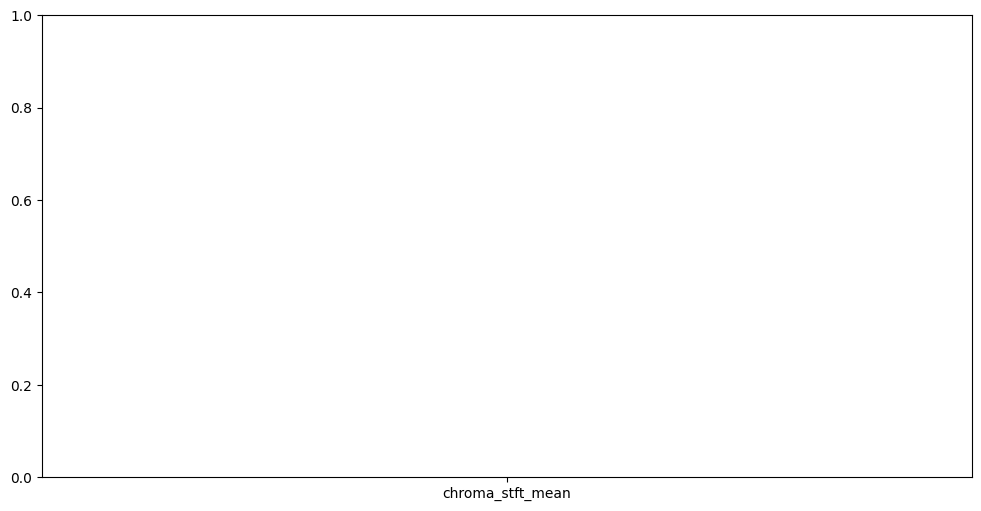

In [85]:
all_contributions = np.sum(contributions, axis=1)

feature_names = features2.columns

plt.figure(figsize=(12, 6))
plt.bar(feature_names, all_contributions)
plt.title('Contributions for All Features')
plt.xlabel('Feature')
plt.ylabel('Summed Contribution')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.show()

In [ ]:
feature_importances = xgb.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

In [ ]:
features1 =  extract_features(r"..\music\Beyoncé-Single Ladies.mp3")
features2 =  extract_features(r"..\music\Outkast-Hey Ya!.mp3")
features3=  extract_features(r"../music/Taylor Swift-Bad Blood.mp3")


print('---------------------------------------------------')

genre1 = xgb.predict(features1)
genreP1 = xgb.predict_proba(features1)
genre2 = xgb.predict(features2)
genreP2 = xgb.predict_proba(features2)

genre3 = xgb.predict(features3)
genreP3 = xgb.predict_proba(features3)

features1['label'] = genre1[0]
features2['label'] = genre2[0]
features3['label'] = genre3[0]

label1 = label_encoder.inverse_transform(genre1)[0]
label2 = label_encoder.inverse_transform(genre2)[0]
label3 = label_encoder.inverse_transform(genre3)[0]

confidence_score(genreP1)
print(label1)

print('---------------------------------------------------')

confidence_score(genreP2)
print(label2)

print('---------------------------------------------------')

confidence_score(genreP3)
print(label3)



In [ ]:
print("Similiar Songs:",find_sim(features1))
print('---------------------------------------------------')

new_features = features1
new_features['tempo'] = 400
print(find_sim(new_features))
print('---------------------------------------------------')




In [ ]:
combined_df = pd.concat([features1, features2], ignore_index=True)
combined_df = pd.concat([combined_df, features3], ignore_index=True)
combined_df = combined_df.drop(['filename'], axis=1)

feature = 'tempo'
pred = find_pred(combined_df, features1)
print("Predicted feature: ",pred)
# pred_features = features1
# pred_features[feature] = pred
print("Predicted Song: " ,find_sim(pred))

In [ ]:
# %pip install tensorflow